In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset global des équipes
df = pd.read_parquet("../data/curated/team_gamelog_all_seasons.parquet")
print(df.shape)
df.head()


(59968, 30)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,season
0,21999,1610612752,NYK,New York Knicks,0029900001,1999-11-02,NYK vs. CLE,W,240,32,...,44,17,10,10,18,23,92,8,0,1999-00
1,21999,1610612749,MIL,Milwaukee Bucks,0029900008,1999-11-02,MIL @ HOU,W,240,38,...,35,20,10,2,8,25,98,5,0,1999-00
2,21999,1610612751,NJN,New Jersey Nets,0029900002,1999-11-02,NJN vs. IND,L,240,36,...,45,11,11,4,18,39,112,-7,0,1999-00
3,21999,1610612745,HOU,Houston Rockets,0029900008,1999-11-02,HOU vs. MIL,L,240,34,...,42,22,5,7,18,24,93,-5,0,1999-00
4,21999,1610612739,CLE,Cleveland Cavaliers,0029900001,1999-11-02,CLE @ NYK,L,240,30,...,38,23,10,2,19,27,84,-8,0,1999-00


In [3]:
# Calcul des stats moyennes par équipe (sur toutes les saisons)
team_profiles = df.groupby("TEAM_NAME").agg({
    "PTS": "mean",
    "AST": "mean",
    "FG3M": "mean" if "FG3M" in df.columns else "PTS",  # adapter si besoin
    "REB": "mean",
    "STL": "mean",
    "BLK": "mean",
    "TOV": "mean"
})
team_profiles


,PTS,AST,FG3M,REB,STL,BLK,TOV
TEAM_NAME,,,,,,,
Atlanta Hawks,101.495769,22.540567,7.957193,42.363365,7.625684,4.813340,14.845197
Boston Celtics,102.456802,22.882820,8.838133,42.232870,8.091857,4.658391,14.521847
Brooklyn Nets,106.800830,23.375519,10.800830,43.434647,7.076763,4.740664,14.532158
Charlotte Bobcats,94.599502,21.036070,5.379353,40.478856,7.452736,5.101990,14.512438
Charlotte Hornets,103.878730,23.637151,9.435996,43.672762,7.469682,5.057748,13.403272
Chicago Bulls,99.263079,22.542601,7.192327,43.401594,7.391131,4.905331,14.799701
Cleveland Cavaliers,100.718485,22.196313,7.837569,42.950174,7.251619,4.581465,14.534629
Dallas Mavericks,104.355478,22.313832,9.101140,42.358949,7.257809,4.797224,12.965295
Denver Nuggets,104.859057,24.217866,7.852605,43.656576,7.945906,5.321588,14.808437


In [5]:
import pandas as pd
import numpy as np

# Calcul des stats moyennes par équipe
team_stats = df.groupby("TEAM_NAME").agg({
    "PTS": "mean",
    "AST": "mean",
    "FG3M": "mean" if "FG3M" in df.columns else "PTS",
    "REB": "mean",
    "STL": "mean",
    "BLK": "mean",
    "TOV": "mean"
})

# Scores bruts
team_stats["off_score_raw"] = team_stats["PTS"] + 1.5*team_stats["AST"] + team_stats["FG3M"]
team_stats["def_score_raw"] = team_stats["REB"] + team_stats["STL"] + team_stats["BLK"] - team_stats["TOV"]

# Normalisation (z-score)
team_stats["off_score"] = (team_stats["off_score_raw"] - team_stats["off_score_raw"].mean()) / team_stats["off_score_raw"].std()
team_stats["def_score"] = (team_stats["def_score_raw"] - team_stats["def_score_raw"].mean()) / team_stats["def_score_raw"].std()


In [6]:
seuil = 0.5  # seuil en écart-type

def get_style(row):
    if row["off_score"] > row["def_score"] + seuil:
        return "offensive"
    elif row["def_score"] > row["off_score"] + seuil:
        return "défensive"
    else:
        return "équilibrée"

team_stats["style"] = team_stats.apply(get_style, axis=1)
display(team_stats[["off_score", "def_score", "style"]])


,off_score,def_score,style
TEAM_NAME,,,
Atlanta Hawks,0.029201,-0.450513,équilibrée
Boston Celtics,0.363625,-0.119433,équilibrée
Brooklyn Nets,1.364016,0.050446,offensive
Charlotte Bobcats,-1.636400,-1.393711,équilibrée
Charlotte Hornets,0.811059,1.414624,défensive
Chicago Bulls,-0.395973,0.167644,défensive
Cleveland Cavaliers,-0.171465,-0.259096,équilibrée
Dallas Mavericks,0.549369,0.529102,équilibrée
Denver Nuggets,0.849112,0.967153,équilibrée


In [13]:
# Scores offensif et défensif (à adapter selon tes colonnes)
team_stats = df.groupby("TEAM_NAME").agg({
    "PTS": "mean",
    "AST": "mean",
    "FG3M": "mean" if "FG3M" in df.columns else "PTS",
    "REB": "mean",
    "STL": "mean",
    "BLK": "mean",
    "TOV": "mean"
})

# Score offensif (exemple)
team_stats["off_score"] = (
    0.5 * team_stats["PTS"] +
    0.2 * team_stats["AST"] +
    0.2 * team_stats["FG3M"] +
    0.1 * team_stats["REB"]
)

# Score défensif (exemple)
team_stats["def_score"] = (
    0.3 * team_stats["REB"] +
    0.25 * team_stats["STL"] +
    0.25 * team_stats["BLK"] -
    0.2 * team_stats["TOV"]
)


In [14]:
# Normalisation (z-score)
team_stats["off_score_norm"] = (team_stats["off_score"] - team_stats["off_score"].mean()) / team_stats["off_score"].std()
team_stats["def_score_norm"] = (team_stats["def_score"] - team_stats["def_score"].mean()) / team_stats["def_score"].std()


In [15]:
seuil = 0.5  # seuil en écart-type, à ajuster selon la distribution

def get_style(row):
    if row["off_score_norm"] > row["def_score_norm"] + seuil:
        return "offensive"
    elif row["def_score_norm"] > row["off_score_norm"] + seuil:
        return "défensive"
    else:
        return "équilibrée"

team_stats["style"] = team_stats.apply(get_style, axis=1)
display(team_stats[["off_score_norm", "def_score_norm", "style"]])


,off_score_norm,def_score_norm,style
TEAM_NAME,,,
Atlanta Hawks,-0.016861,-0.392632,équilibrée
Boston Celtics,0.250585,-0.145319,équilibrée
Brooklyn Nets,1.295901,0.154504,offensive
Charlotte Bobcats,-1.689298,-1.517275,équilibrée
Charlotte Hornets,0.673249,1.290723,défensive
Chicago Bulls,-0.454435,0.289339,défensive
Cleveland Cavaliers,-0.175629,-0.185185,équilibrée
Dallas Mavericks,0.588880,0.274332,équilibrée
Denver Nuggets,0.781418,1.049285,équilibrée


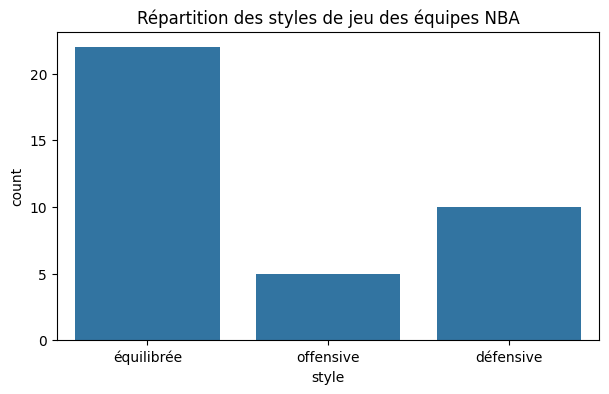

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(x="style", data=team_stats)
plt.title("Répartition des styles de jeu des équipes NBA")
plt.show()
